In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from dg_new_splitting_inhomogeneous import *
%matplotlib inline

In [10]:
def analytical_u(x,xp,t):
    for i in range(len(x)):
        if np.round(x[i][-1],8) == np.round(xp,8):
            k = i
            pass
    u_left  = [np.cos(x[i]+t) for i in range(k+1)]
    u_right = [np.sin(x[i]-t) for i in range(k+1,len(x))]
    u = np.array(u_left+u_right)
    return u
        
def analytical_p(x,xp,t):
    for i in range(len(x)):
        if np.round(x[i][-1],8) == np.round(xp,8):
            k = i
            break
    p_left  = [-np.sin(x[i]+t) for i in range(k+1)]
    p_right = [-np.cos(x[i]-t) for i in range(k+1,len(x))]
    p = np.array(p_left+p_right)
    return p
    
def analytical_q(x,xp,t):
    for i in range(len(x)):
        if np.round(x[i][-1],8) == np.round(xp,8):
            k = i
            break
    q_left  = [-np.sin(x[i]+t) for i in range(k+1)]
    q_right = [np.cos(x[i]-t) for i in range(k+1,len(x))]
    q = np.array(q_left+q_right)
    return q

In [11]:
xp = 0.
def source_minus_A(t):
        return -np.cos(xp-t) - np.sin(xp+t)
def source_D_dot(t):
    return  np.cos(xp-t) - np.sin(xp+t)
x_test_point = np.pi/2

In [12]:
K_range = np.arange(4,25,2)
N_range = np.arange(2,13,2)
error = []
for N in N_range:
    error_same_N = []
    for K in K_range:
        CF = 2.**(-7)
        start = 0.
        end = 2.*np.pi
        a1 = 1.
        a2 = -1.
        alpha = 0.
        h = (end-start)/K

        reference_element = ReferenceElement(N)
        reference_interval = reference_element[0]
        M_inv = reference_element[1]*2/h
        M_inv_S = reference_element[2]*2/h
        
        x = get_x_elements(start,end, K, reference_interval)
        dx_min = get_dx_min(x)
        dt = CF*dx_min
        
        for i in range(len(x)):
                if np.round(x[i][-1],8) == np.round(xp,8):
                    k_xp = i
                    break
                if np.round(x[i][-1],8) == np.round(x_test_point,8):
                    k_test_point = i
        
        t = 0.
        t_target = 4.0
        nt = int((t_target-t)/dt)
        u = analytical_u(x,xp,t)
        p = analytical_p(x,xp,t)
        q = analytical_q(x,xp,t)
        for i in range(nt):
            un = u.copy()
            pn = p.copy()
            qn = q.copy()
            u = RK4_Step(dt, du_dt,un,pn,qn,K,N,t,M_inv,M_inv_S,False)
            p = RK4_Step(dt, dp_dt,pn,un,qn,K,N,t,M_inv,M_inv_S,True,source_minus_A, source_D_dot,k_xp)#,potential_term)
            q = RK4_Step(dt, dq_dt,qn,un,pn,K,N,t,M_inv,M_inv_S,True,source_minus_A, source_D_dot,k_xp)
            t += dt
        
        u_ana = analytical_u(x,xp,t)
        error_N_K = error_same_N.append(u[k_test_point][-1]-u_ana[k_test_point][-1])
    error.append(error_same_N)

KeyboardInterrupt: 

IndexError: list index out of range

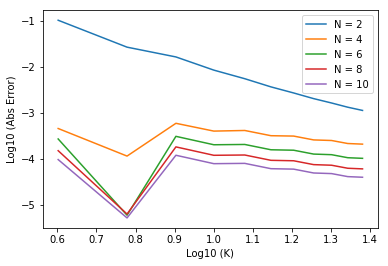

In [13]:
for i in range(len(N_range)):
    plt.plot(np.log10(K_range),np.log10(np.abs(error[i])), label = 'N = '+str(N_range[i]))
    plt.ylabel('Log10 (Abs Error)')
    plt.xlabel('Log10 (K)')
    plt.legend()
    

In [14]:
error

[[0.1023891865689397,
  0.0266808976376397,
  0.016368862930260075,
  0.008471600508984767,
  0.005512968441315991,
  0.0036648894237957252,
  0.0027051384168969017,
  0.002038188097208238,
  0.0016389381640523615,
  0.0013276921278669862,
  0.0011302310605181276],
 [-0.0004583169471210624,
  -0.00011548619458812137,
  0.00059414501312538,
  0.00040245431283925104,
  0.00041509673052508855,
  0.00031967983610270423,
  0.0003138005574082614,
  0.00025903213503941647,
  0.00025159107681194115,
  0.00021639816352536645,
  0.00020976554501972444],
 [0.00027170335322512784,
  -6.023440066726948e-06,
  0.0003097224863580772,
  0.00020342556290964264,
  0.0002064336604989947,
  0.00015829355369856302,
  0.0001548263113180237,
  0.00012762810196587093,
  0.00012383976892027526,
  0.00010647107550199042,
  0.00010320352501336227],
 [0.00015122137708589722,
  -6.378397594541951e-06,
  0.00018283644768724017,
  0.00012010633654546687,
  0.00012186644745426634,
  9.344869949801105e-05,
  9.1396647